![example](images/director_shot.jpeg)

# Analysis of Movie Releases 

**Author:** Colm Yeh
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-Movie-Releases" data-toc-modified-id="Analysis-of-Movie-Releases-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of Movie Releases</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#IMDB-Title-Basics" data-toc-modified-id="IMDB-Title-Basics-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>IMDB Title Basics</a></span></li><li><span><a href="#IMDB-Title-Ratings" data-toc-modified-id="IMDB-Title-Ratings-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>IMDB Title Ratings</a></span></li><li><span><a href="#Movie-Budgets" data-toc-modified-id="Movie-Budgets-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Movie Budgets</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Determining-the-most-profitable-release-months:" data-toc-modified-id="Determining-the-most-profitable-release-months:-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Determining the most profitable release months:</a></span></li><li><span><a href="#Determining-the-most-profitable-genres:" data-toc-modified-id="Determining-the-most-profitable-genres:-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Determining the most profitable genres:</a></span></li><li><span><a href="#Determining-if-good-ratings-correlate-with-profitability" data-toc-modified-id="Determining-if-good-ratings-correlate-with-profitability-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Determining if good ratings correlate with profitability</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Limitations-of-Analysis" data-toc-modified-id="Limitations-of-Analysis-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Limitations of Analysis</a></span></li></ul></li></ul></li></ul></div>

## Overview

This project examines the successes and failures of new movie releases for the purposes of finding the most profitable and successful movie release strategy.

Drawing from IMDB databases and the movie budgets database, this analysis provides 3 concrete business recommendations to ensure a profitable market entry for Microsoft's projects:

1.) Release movies during the most profitable release months.

2.) Release movies belonging to the most profitable genres.

3.) Focus artistic and strategic direction on the end consumer, not critics.


## Business Problem

Microsoft has decided to enter the video content space, and this analysis provides actionable insights on which kind of projects perform the best. Due to the capital intensive nature of making movies, choosing projects with proven releases and genres is extremely important for meaningful return on investment.

To this end, this analysis seeks to answer the most profitable movie genres (1), the most profitable time of the year to release (2), and whether resources should be committed to pleasing critics and garner good ratings (3). These combined insights will allow Microsoft to choose projects with proven profitability. 
***


## Data Preparation



In [10]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip as gz
%matplotlib inline

### IMDB Title Basics

In [15]:
# Here you run your code to explore the data
#load in title.basics
df_titlebasics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression='gzip')
df_titlebasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [60]:
df_titlebasics['genres'].value_counts() #explore titlebasics

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [53]:
#set index to tconst to combine easier with titleratings:
df_titlebasics.set_index('tconst', inplace=True)


### IMDB Title Ratings

In [16]:
#load in titleratings
df_titleratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df_titleratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [50]:
df_titleratings.describe() #titleratings descriptive stats

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [56]:
#set index to tconst to line up with titlebasics
df_titleratings.set_index('tconst', inplace=True)

### Movie Budgets

In [25]:
#load in movie budgets
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', compression='gzip', index_col=0)
df_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [33]:

df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [38]:
#convert production budget, domestic_gross, and worldwide_gross to float, 
#so I can retrieve summary stats

df_budgets['production_budget'] = df_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)

In [41]:
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"


In [44]:
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df_budgets.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [46]:
#summary stats of budgets:
df_budgets.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [67]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   profit             5782 non-null   float64
dtypes: float64(4), object(2)
memory usage: 316.2+ KB


## Data Analysis



In [6]:

#plot with release date and profit --> reccommend best time of the year to
#release 

In [61]:
#join titlebasics and titleratings with merge:
rating_genre = pd.merge(df_titleratings, df_titlebasics, on='tconst')
rating_genre


,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [93]:
#group by genre with avg rating for each genre:
test = rating_genre.groupby('genres').mean().reset_index()
test

,genres,averagerating,numvotes,start_year,runtime_minutes
0,Action,5.757712,336.115424,2014.271706,103.201110
1,"Action,Adult,Comedy",4.650000,18.000000,2014.000000,71.000000
2,"Action,Adventure",5.223529,1603.102941,2014.205882,105.354839
3,"Action,Adventure,Animation",6.562874,21380.497006,2014.676647,92.981013
4,"Action,Adventure,Biography",7.061905,47604.809524,2015.047619,105.500000
...,...,...,...,...,...
918,Thriller,5.704244,283.320900,2014.702251,94.880435
919,"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
920,"Thriller,Western",7.150000,3322.000000,2013.250000,95.000000
921,War,6.134043,117.765957,2014.595745,95.600000


### Determining the most profitable release months:

In [ ]:
#create profit column in df_budgets (worldwide gross - production budget)
#groupby release date (month), average profit per month
    
#NOTE: this analysis excludes marketing/selling cost


In [66]:
#profit column creation
df_budgets['profit'] = df_budgets['worldwide_gross'] - df_budgets['production_budget']
df_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [71]:
#groupby release date month
#first change release_date to datetime data type:
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])

In [72]:
#check if works
df_budgets.head()
#CHECK

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [76]:
#Create release_month 
df_budgets['release_month'] = df_budgets['release_date'].apply(lambda x: x.month)
df_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,5
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,6
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,12


In [80]:
releasegroup = df_budgets.groupby('release_month').mean().reset_index() #group by release month
releasegroup.head()

,release_month,production_budget,domestic_gross,worldwide_gross,profit
0,1,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
1,2,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
2,3,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
3,4,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
4,5,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08


In [135]:
df_budgets['release_date'].value_counts()

2014-12-31    24
2015-12-31    23
2010-12-31    15
2008-12-31    14
2009-12-31    13
              ..
1977-10-21     1
2009-06-23     1
2017-09-26     1
2007-11-14     1
2005-07-13     1
Name: release_date, Length: 2418, dtype: int64

Text(0.5, 1.0, 'Most Profitable Release Months')

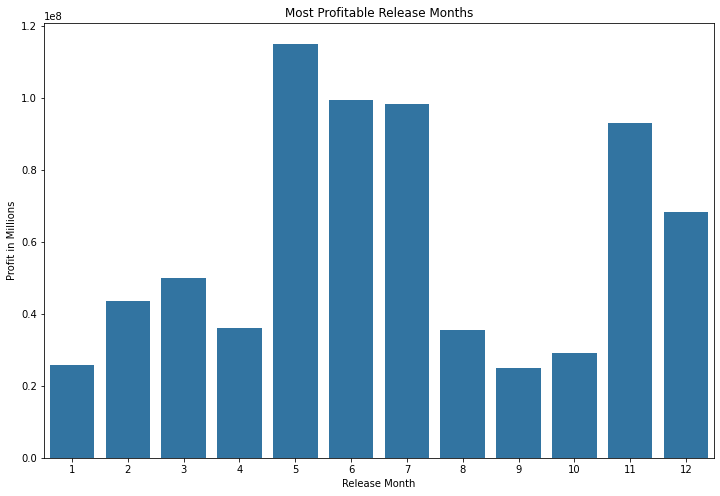

In [86]:
fig,ax= plt.subplots(figsize=(12,8)) #create barplot of profit and release month
sns.barplot(x='release_month', y='profit', data=releasegroup, ax=ax, color='tab:blue')
plt.xlabel('Release Month')
plt.ylabel('Profit in Millions')
plt.title('Most Profitable Release Months')

The months of May, June, July, November, and December (in that order) have the most profitable releases.

### Determining the most profitable genres:

In [98]:
display(rating_genre.head(), df_budgets.head())

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,5
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,6
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,12


In [99]:
#merge budgets and genres dataframes
df = pd.merge(df_budgets, rating_genre, left_on='movie', right_on='original_title')
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,5,6.6,447624,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,6,6.0,24451,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,5,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,4,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,11,6.5,329135,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,12,7.5,85,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama
2634,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,7,4.9,11,Cure,Cure,2011,93.0,Drama
2635,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,1,6.4,1436,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,12,5.6,43,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 0 to 2637
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2638 non-null   datetime64[ns]
 1   movie              2638 non-null   object        
 2   production_budget  2638 non-null   float64       
 3   domestic_gross     2638 non-null   float64       
 4   worldwide_gross    2638 non-null   float64       
 5   profit             2638 non-null   float64       
 6   release_month      2638 non-null   int64         
 7   averagerating      2638 non-null   float64       
 8   numvotes           2638 non-null   int64         
 9   primary_title      2638 non-null   object        
 10  original_title     2638 non-null   object        
 11  start_year         2638 non-null   int64         
 12  runtime_minutes    2532 non-null   float64       
 13  genres             2633 non-null   object        
dtypes: datet

In [105]:
df = df.dropna(subset=['genres']) #drop empty n/a 

In [101]:
x = df.loc[0,'genres']
x

'Action,Adventure,Fantasy'

In [103]:
x.split(',')

['Action', 'Adventure', 'Fantasy']

In [107]:
df['Genres'] = df['genres'].apply(lambda x: x.split(',')) #split genre column
df

<ipython-input-107-9e408de178d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genres'] = df['genres'].apply(lambda x: x.split(','))


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Genres
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,5,6.6,447624,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,6,6.0,24451,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,5,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,4,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,11,6.5,329135,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,12,7.5,85,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,[Drama]
2634,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,7,4.9,11,Cure,Cure,2011,93.0,Drama,[Drama]
2635,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,1,6.4,1436,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama","[Comedy, Drama]"
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,12,5.6,43,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller","[Horror, Sci-Fi, Thriller]"


In [110]:
genres_df = df.explode('Genres') #explode genres, put into individual column
genres_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Genres
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635063875.0,5,6.6,447624,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635063875.0,5,6.6,447624,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,635063875.0,5,6.6,447624,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-200237650.0,6,6.0,24451,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-200237650.0,6,6.0,24451,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7000.0,12,5.6,43,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",Sci-Fi
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7000.0,12,5.6,43,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",Thriller
2637,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,9,5.4,72,A Plague So Pleasant,A Plague So Pleasant,2013,76.0,"Drama,Horror,Thriller",Drama
2637,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,9,5.4,72,A Plague So Pleasant,A Plague So Pleasant,2013,76.0,"Drama,Horror,Thriller",Horror


In [118]:
genre_sorted = genres_df.groupby('Genres').mean()['profit'].sort_values(ascending=False)
genre_sorted #groupby genre, aggregated by mean profit, sorted by ascending

Genres
Animation      2.373664e+08
Adventure      2.074772e+08
Sci-Fi         1.757556e+08
Musical        1.539494e+08
Fantasy        1.330488e+08
Action         1.230604e+08
Family         1.114927e+08
Comedy         7.567217e+07
Sport          5.596534e+07
Thriller       5.121894e+07
Mystery        4.923183e+07
Biography      4.659333e+07
Music          4.318527e+07
Horror         4.084986e+07
History        3.993031e+07
Drama          3.754055e+07
Crime          3.580625e+07
Documentary    3.551123e+07
Romance        3.466741e+07
Western        2.792120e+07
War            2.293884e+07
News           1.275783e+07
Name: profit, dtype: float64

In [122]:
genre_sorted.index

Index(['Animation', 'Adventure', 'Sci-Fi', 'Musical', 'Fantasy', 'Action',
       'Family', 'Comedy', 'Sport', 'Thriller', 'Mystery', 'Biography',
       'Music', 'Horror', 'History', 'Drama', 'Crime', 'Documentary',
       'Romance', 'Western', 'War', 'News'],
      dtype='object', name='Genres')

Text(0.5, 1.0, 'Most Profitable Genres')

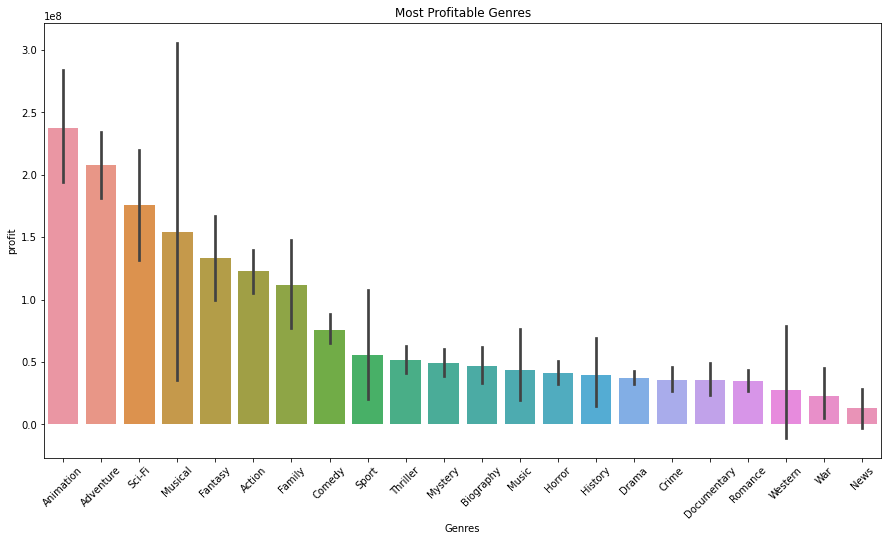

In [132]:
fig,ax= plt.subplots(figsize=(15,8)) #create barplot of profit genre
sns.barplot(x='Genres', y='profit', data=genres_df, order= genre_sorted.index, 
            ax=ax,)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title("Most Profitable Genres")


Movies occupying the animation, adventure, and sci-fi genres have historically been the most profitable within tolerable variability.

### Determining if good ratings correlate with profitability

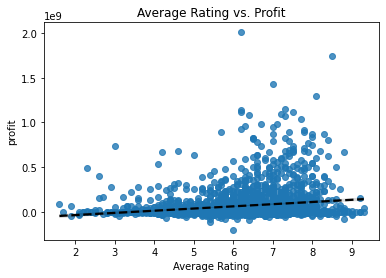

In [131]:
ax = sns.regplot(x="averagerating", y="profit", 
                 line_kws={'color':'k', 'ls':'--'}, data=df) #scatter plot of rating/profit
ax.set_title("Average Rating vs. Profit")
ax.set_xlabel("Average Rating"); 

In [126]:
from scipy import stats #find correlation
stats.pearsonr(df['averagerating'], df['profit'])


(0.17764606197985078, 4.141232575645186e-20)

In [128]:
r_squared = 0.17764606197985078**2 #r^2 represents strength of correlation
r_squared

0.03155812333694898

Weak positive correlation, as indicated by r_squared being a meager .03155. However, still statistically significant with p-value=4.141232575645186e-20.

Therefore, while rating is positively correlated with profit, the relationship is weak at best. Critics' ratings are a litmus test of movie quality, but good ratings may not be the best metric of profitability of a movie.

Movie critics may examine movies on different criteria (acting caliber, 
cinematography, etc.) than the average movie goer. This systematic difference 
results in ratings having a very weak correlation with profit. 

## Conclusions


This analysis points to three recommendations for Microsoft's management in selecting, producing, and releasing new projects:

   1.) **Release movies during the most historically profitable release months.** Coinciding with the summer and the holidays, these months are May, June, July, November, and December (in that order). 
    
   2.) **Choose projects occupying the animation, adventure, or sci-fi genres.** Historically, these genres have the highest profitability (in that order) within tolerable variability. With these genres, Microsoft will be best able to capture audiences and drive meaningful return on investment. 
    
   3.) **Focus artistic and strategic direction on the end consumer, not critics.** Since ratings do not correlate strongly with profitability, investing resources into pleasing critics does not necessarily result in ROI. Instead, invest in marketing and promotion targeting the end consumer. Movie critics may examine movies on different criteria (acting caliber, cinematography, total artistic worth etc.) than the average movie goer. This systematic difference results in ratings having a very weak correlation with profit. Trying to live up to artistic perfection that critics demand is simply a waste of resources. 

### Limitations of Analysis

While concrete and actionable, this analysis only considered production budget as the cost input. It did not consider selling, general, or administrative costs. 

Moreover, this analysis does not consider momentum effects in movie series. The profitability of sequels/prequels in a movie series may be systematically different from single entry movies. Momentum effects should be further examined to see if they yield significant profitability. 
   
 